## COVID-19 Daily Analysis Table  
  - This-document: https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - HOW-TO-USE: see results or re-calculate on your own Notebook (Jupyter, Mybinder, Azure, ... )
  - RESULTS: WARNING ON COUNTRIES BY COVID DAILY DEATH RATES
      - rankings and trends on the worst daily deaths by country evaluating last 7 days
  - References:
      - Web charts:  https://dasn.herokuapp.com/covidzoom and https://dasn.herokuapp.com/covid19
      - wolfram & azure notebooks 
      - Data-source: John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/
  - LOOKING FOR REGIONAL SOURCES (Estado, Staat, CCAA, Canton, ...) IN ORDER TO CALCULATE BY AREA

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,Brazil,United Kingdom,Italy,France,Spain,Mexico,Sweden,Germany,Belgium,Russia,India,Canada,Peru,Netherlands,Canada
5/6/20,2367,650,649,369,274,244,197,87,282,323,86,92,112,89,36,55
5/7/20,2231,602,539,274,177,213,257,99,117,76,88,104,121,94,84,47
5/8/20,1518,827,626,243,243,229,199,135,118,106,98,96,94,87,71,58


worst daily deaths by country evaluating last 7 days:


Country/Region
US                1801.444444
United Kingdom     571.555556
Brazil             500.444444
Italy              279.888889
France             237.333333
Spain              224.888889
Mexico             158.666667
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
      - data source: John Hopkins https://github.com/CSSEGISandData/COVID-19/
      - thanks to resources by http://Jupyter.org  http://MyBinder.org  http://Heroku.com and above
  - LOOKING FOR REGIONAL SOURCES (Estado, Staat, CCAA, Canton, ...) IN ORDER TO CALCULATE BY AREA

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 34.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 37 kB/s s eta 0:00:01
     |████████████████████████████████| 26.1 MB 112 kB/s  eta 0:00:01
     |████████████████████████████████| 12.4 MB 46.0 MB/s eta 0:00:01    |███████████████████▍            | 7.5 MB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 5.9 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 12.1 MB/s eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1500      0 --:--:-- --:--:-- --:--:--  1500
100 73682  100 73682    0     0   260k      0 --:--:-- --:--:-- --:--:--  260k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
Country/Region,,,,,,,,,,,,,
US,54881,56219,58355,60967,62996,64943,66369,67682,68922,71064,73431,75662,77180
United Kingdom,24055,24393,25302,26097,26771,27510,28131,28446,28734,29427,30076,30615,31241
Italy,26644,26977,27359,27682,27967,28236,28710,28884,29079,29315,29684,29958,30201
Spain,23190,23521,23822,24275,24543,24543,25100,25264,25428,25613,25857,26070,26299
France,22825,23262,23629,24056,24345,24563,24729,24864,25168,25498,25772,25949,26192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Honduras,59,61,64,66,71,75,76,82,83,93,99,105,107
Bolivia,50,53,55,59,62,66,71,76,82,86,91,102,106
Iraq,87,88,90,92,93,94,95,97,98,102,102,102,104


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
May 9th warning on Brazil Mexico in addition to cited March-30th: US UK Italy Spain France Germany 

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
Country/Region,,,,,,,,,,,,
US,1338,2136,2612,2029,1947,1426,1313,1240,2142,2367,2231,1518
Brazil,317,480,430,493,406,349,290,316,571,650,602,827
United Kingdom,338,909,795,674,739,621,315,288,693,649,539,626
Italy,333,382,323,285,269,474,174,195,236,369,274,243
France,437,367,427,289,218,166,135,304,330,274,177,243
Spain,331,301,453,268,0,557,164,164,185,244,213,229
Mexico,83,135,163,127,113,89,93,117,236,197,257,199
Sweden,80,81,107,124,67,16,10,90,85,87,99,135
Germany,150,188,153,156,113,76,54,127,0,282,117,118


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1338,2136,2612,2029,1947,1426,1313,1240,2142,2367,2231,1518"
data-datasets="317,480,430,493,406,349,290,316,571,650,602,827"
data-datasets="338,909,795,674,739,621,315,288,693,649,539,626"
data-datasets="333,382,323,285,269,474,174,195,236,369,274,243"
data-datasets="437,367,427,289,218,166,135,304,330,274,177,243"
data-datasets="331,301,453,268,0,557,164,164,185,244,213,229"
data-datasets="83,135,163,127,113,89,93,117,236,197,257,199"
data-datasets="80,81,107,124,67,16,10,90,85,87,99,135"
data-datasets="150,188,153,156,113,76,54,127,0,282,117,118"
data-datasets="113,124,170,93,109,62,79,80,92,323,76,106"
data-datasets="47,73,105,101,96,53,58,76,95,86,88,98"
data-datasets="58,69,71,75,69,100,68,175,127,92,104,96"
data-datasets="84,83,79,97,163,114,70,75,118,112,121,94"
data-datasets="54,72,89,108,73,76,86,58,100,89,94,87"
data-datasets="43,48,145,84,98,94,69,26,86,36,84,71"
data-datasets="63,49,81,52,60,2

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Afghanistan,Algeria,Argentina,Austria,Bangladesh,Belarus,Belgium,Bolivia,Brazil,Cameroon,...,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom,US
5/5/20,5,5,4,6,1,4,92,4,571,0,...,1,10,185,85,11,59,13,9,693,2142
5/6/20,9,6,9,2,3,5,323,5,650,44,...,1,5,244,87,10,64,11,11,649,2367
5/7/20,2,7,9,1,13,4,76,11,602,0,...,0,8,213,99,5,57,13,8,539,2231
5/8/20,3,5,11,5,7,5,106,4,827,0,...,1,17,229,135,13,48,21,9,626,1518


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1809.428571
United Kingdom     549.142857
Brazil             454.857143
Italy              284.428571
France             229.142857
Spain              218.142857
Mexico             157.428571
dtype: float64

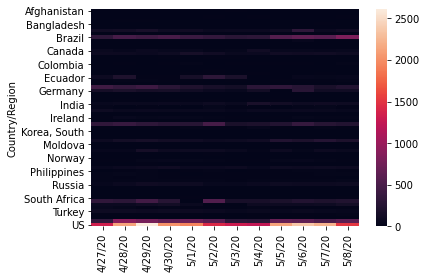

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

65 6.0


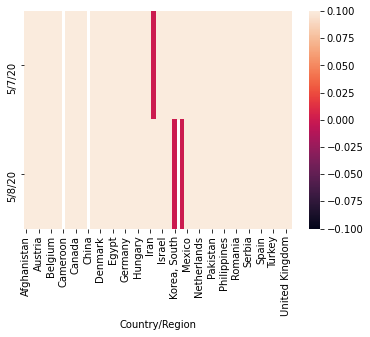

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,5/8/20
Country/Region,
South Africa,2.125000
Brazil,1.680273
Sweden,1.648169
Ukraine,1.638298
Greece,1.571429
...,...
"Korea, South",0.000000
Luxembourg,0.000000
Malaysia,0.000000


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 674 kB/s eta 0:00:011
     |████████████████████████████████| 11.5 MB 98 kB/s  eta 0:00:01    |█████▎                          | 1.9 MB 4.1 MB/s eta 0:00:03
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=5bd28526357218c44d12c0da147fb76d783ab78ab9275dd8190d48567b492341
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
